# Atividade Pontuada 05

## RAFAEL TAKEGUMA GOTO - 202100011833 
## HELENA CARVALHO LEAL - 202200134925

Realize uma adaptação do Jupyter Notebook apresentado na Aula 22 para realizar a detecção das
circunferências de raio 20, substituindo a função hough_circle por uma elaborada por você.
Continue a usar a função hough_circle_peaks do módulo skimage para localizar os centros das
circunferências com maior número de pontos. No caso a grade é em 2D

In [1]:
from skimage.data import coins
import matplotlib.pyplot as plt
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.filters import sobel
import numpy as np
from skimage.morphology import binary_opening, binary_closing
from skimage import color
from skimage.draw import circle_perimeter

In [2]:
image = coins()[100:170,:200]

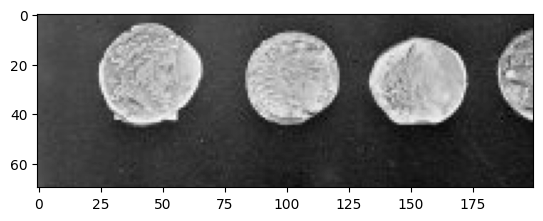

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
h = np.histogram (image.ravel(),bins=256)

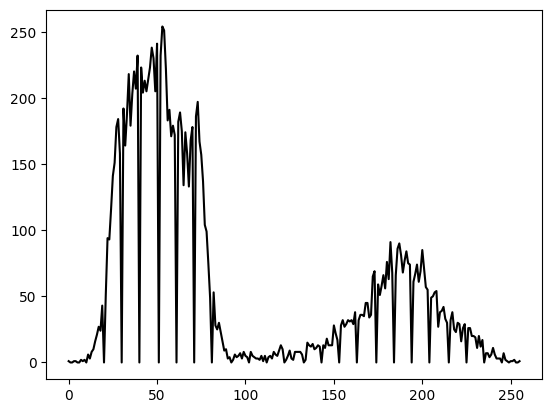

In [5]:
plt.plot (h[0],'-k')

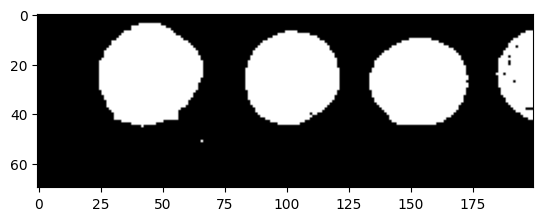

In [6]:
binary=image.copy()
limiar = image.max()*(110/256)
binary[binary<=limiar]=0
binary[binary>0]=1
plt.imshow(binary*255,cmap='gray')

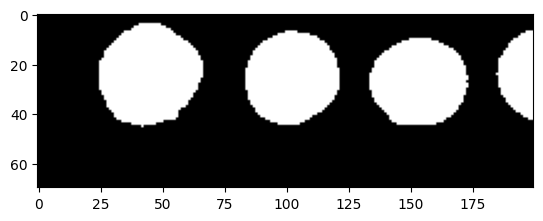

In [7]:
binary = binary_opening (binary)
binary = binary_closing (binary)
plt.imshow (binary,cmap='gray')

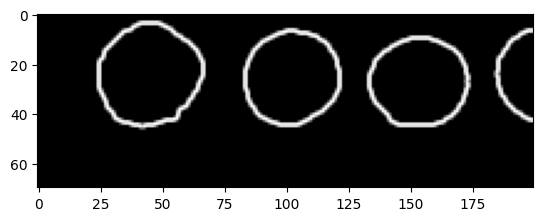

In [8]:
edges = sobel (binary)
plt.imshow(edges,cmap='gray')

## Usando nossa função implementada

In [9]:
def incrementa_raio(array, ponto, R):
    # Criando uma matriz de zeros do mesmo tamanho da matriz de entrada para armazenar os resultados
    array_resultado = np.zeros_like(array)

    # Percorrendo as coordenadas da imagem
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            # Calculando a distância entre o centro e as coordenadas
            distancia = np.linalg.norm([i - ponto[0], j - ponto[1]])
            
            # Se a distância for aproximadamente R incrementamos o valor da coordenada
            if (distancia >= R and distancia < R + 0.5):
                array_resultado[i, j] = array[i, j] + 1
            else:
                array_resultado[i, j] = array[i, j]
    
    return array_resultado

In [11]:
def my_hough_circle(edges):
    # Criando uma cópia da matriz de bordas para evitar alterações na matriz original
    bordas = np.copy(edges)

    # Percorrendo todos os pontos da imagem para buscar quais são foreground
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            pixel = edges[i, j]
            # se o ponto for diferente de zero então é foreground
            if (pixel != 0):
                # Incrementamos os valores com coordenadas a uma distancia 20 do pixel
                bordas = incrementa_raio(bordas, (i, j), 20)
                
    return bordas

In [12]:
raios = np.arange (16,36,2)
my_hough_grade = my_hough_circle(edges)

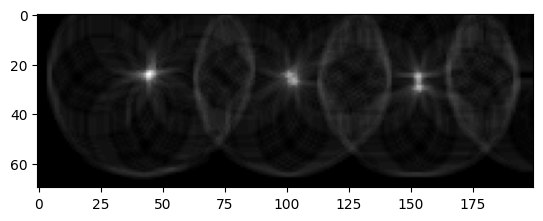

In [13]:
plt.imshow (my_hough_grade, cmap='gray')

## Usando a função do skimage

In [14]:
hough_grade = hough_circle (edges, raios)

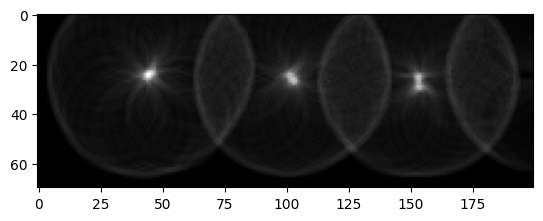

In [15]:
raio = 20
grade = hough_grade[2] 
plt.imshow (grade,cmap='gray')

In [16]:
acumuladores, a, b, raio = hough_circle_peaks(hough_grade, raios, total_num_peaks=10)

In [17]:
acumuladores

array([0.81666667, 0.78846154, 0.70192308, 0.68269231, 0.64166667,
       0.61666667, 0.61666667, 0.578125  , 0.50961538, 0.5       ])

In [18]:
a,b

(array([ 44, 154, 102, 152, 103, 153, 153,  46,  42, 149]),
 array([24, 27, 26, 27, 26, 25, 29, 26, 26, 28]))

In [19]:
raio

array([20, 18, 18, 18, 20, 20, 20, 22, 18, 16])

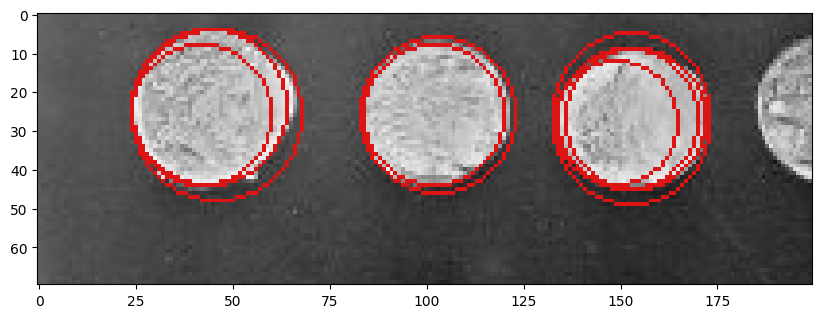

In [20]:
# desenho da figura
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image_color = color.gray2rgb(image)
for center_y, center_x, radius in zip(b, a, raio):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)

    image_color[circy, circx] = (220, 20, 20)
ax.imshow(image_color, cmap=plt.cm.gray)

In [ ]:
acumuladores_, a_, b_, raio_ = hough_circle_peaks(my_hough_grade, [20], total_num_peaks=10)